# House Price Prediction

In [1]:
#import libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
#import dataset with pandas

house = pd.read_csv('C:\\Users\\bittu\\Desktop\\home_data.csv' , encoding="ISO-8859-1")

In [3]:
#first 5 data from dataset
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#info about dataset
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null int64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(4), int64(16), object(1)
memory usage: 3.5+ MB


In [5]:
# X is features of houses y is price
# we use X(capital) for two dimentional array y(small) for single dimentional array
X = house[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','grade','sqft_basement','yr_built','condition','zipcode']]
y = house['price']

In [6]:
X.shape #two dimentional array

(21613, 11)

In [7]:
y.shape #single dimentional array

(21613,)

In [8]:
# check dataset 
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,grade,sqft_basement,yr_built,condition,zipcode
0,3,1.00,1180,5650,1.0,1180,7,0,1955,3,98178
1,3,2.25,2570,7242,2.0,2170,7,400,1951,3,98125
2,2,1.00,770,10000,1.0,770,6,0,1933,3,98028
3,4,3.00,1960,5000,1.0,1050,7,910,1965,5,98136
4,3,2.00,1680,8080,1.0,1680,8,0,1987,3,98074
...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,1530,8,0,2009,3,98103
21609,4,2.50,2310,5813,2.0,2310,8,0,2014,3,98146
21610,2,0.75,1020,1350,2.0,1020,7,0,2009,3,98144
21611,3,2.50,1600,2388,2.0,1600,8,0,2004,3,98027


In [9]:
# import libraries from scikit learn
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.3 , random_state=7) #random_state is optional

### Now checking train and test dataset

In [10]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,grade,sqft_basement,yr_built,condition,zipcode
20204,4,2.50,3148,9612,2.0,3148,9,0,2014,3,98198
15604,3,3.50,3030,11550,2.0,3030,8,0,1971,3,98146
2163,3,3.50,1460,1021,2.0,1150,8,310,2006,3,98122
6338,3,2.50,2000,1950,3.0,2000,8,0,2005,3,98109
19379,4,2.50,1950,2617,1.5,1250,7,700,1910,4,98107
...,...,...,...,...,...,...,...,...,...,...,...
919,5,1.50,2120,7700,1.5,2120,7,0,1962,5,98058
20691,2,2.25,1060,1208,2.0,940,8,120,2005,3,98102
5699,3,2.00,2350,5700,1.5,1810,8,540,1939,4,98112
10742,4,2.50,2760,13093,2.0,2760,9,0,1989,4,98075


### There are 15129 rows before train there is 21613 there is 70% data and 30% will be in test set

In [11]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,grade,sqft_basement,yr_built,condition,zipcode
18732,5,1.75,1250,10530,1.0,1250,7,0,1966,4,98007
18573,3,2.50,2660,10928,2.0,1830,9,830,1988,3,98006
11401,3,1.75,2480,4000,1.0,1240,8,1240,1948,3,98122
19712,3,2.50,1584,3200,2.0,1584,7,0,2011,3,98002
17921,4,2.50,2430,3249,2.0,2430,8,0,2010,3,98059
...,...,...,...,...,...,...,...,...,...,...,...
8169,2,1.00,1050,8382,1.0,1050,7,0,1959,3,98040
11010,3,1.00,1230,4600,1.5,1230,7,0,1929,3,98116
739,3,2.00,1400,9177,1.0,1400,7,0,1974,3,98001
7840,4,2.75,1930,3840,1.0,1170,7,760,1997,3,98106


##### We sucessfully splited data into training set and testing set

# Now we are making LinerRegression Model

In [12]:
#import libraries from sklearn 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#now we'll fit into X
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
#predict the prices
prediction = model.predict(X_test)

In [14]:
prediction

array([197031.56526702, 812763.86299   , 753618.22994437, ...,
       297574.71157263, 310088.88856254, 329418.42878427])

In [15]:
#sucessfully predicted

In [16]:
house0 = house[house['id'] == 7129300520] # created house1 whose id is 7129300520 in dataset

In [17]:
house0['price']

0    221900
Name: price, dtype: int64

In [18]:
#now predicted price is 
prediction[0]

197031.56526702363

### Regular Price is 221900 and Predicted Price is 197031

# Data visulization

Text(0, 0.5, 'Predicted price')

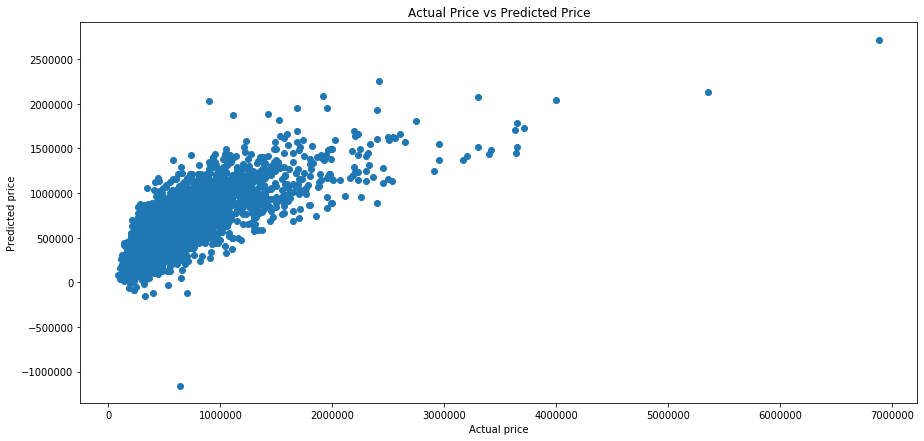

In [19]:
plt.figure(figsize=(15,7))# just for bigger image
plt.scatter(y_test,prediction)
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')

In [20]:
#Coefficient of featured (eg. bedrooms, bathrooms ....... zipcode)
model.coef_

array([-5.47999393e+04,  4.96506414e+04,  1.32022773e+02, -2.47011137e-01,
        3.60909090e+04,  5.44675511e+01,  1.28169963e+05,  7.75552221e+01,
       -3.99869981e+03,  1.75394672e+04,  4.13469584e+01])

In [21]:
pd.DataFrame(model.coef_) # this is shown how our predicted price is Negative or Positive

,0
0,-54799.939332
1,49650.641411
2,132.022773
3,-0.247011
4,36090.908993
5,54.467551
6,128169.962549
7,77.555222
8,-3998.699813
9,17539.467191


# Root Mean Square Error

In [22]:
#import library
from sklearn import metrics as mt
mse = mt.mean_squared_error(y_test,prediction) # mse = mean squre error
RMSE = np.sqrt(mse) # RMSE = Root Mean Squre error

In [23]:
RMSE

228904.93836419654